In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

In [2]:
# 3 materials, 2 interfaces
mat1_interf = 3
mat2_thick = 0
mat2_interf = 3 #conformal
mat3_interf = 3
mat3_thick = 150

In [3]:
z = np.linspace(-50, 50, 5001)
mat1_cdf = scipy.stats.norm.cdf(x=z, loc=0, scale=mat1_interf)
mat2_cdf = scipy.stats.norm.cdf(x=z, loc=0+mat2_thick, scale=mat2_interf)
mat3_cdf = scipy.stats.norm.cdf(x=z, loc=0+mat2_thick+mat3_thick, scale=mat3_interf)

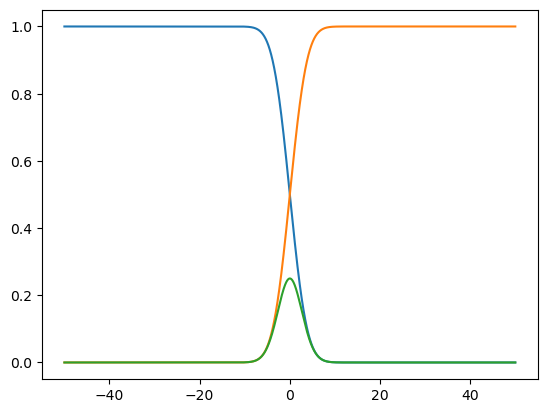

In [4]:
plt.plot(z, (1-mat1_cdf))
plt.plot(z, (mat2_cdf))
plt.plot(z, (mat1_cdf)*(1-mat2_cdf))
#plt.plot(z, (mat1_cdf)*(mat2_cdf)*(1-mat3_cdf))

In [5]:
mat1_pos_plot = scipy.stats.norm.rvs(loc=0, scale=mat1_interf, size=500000)
mat2_pos_plot = scipy.stats.norm.rvs(loc=0+mat2_thick, scale=mat2_interf, size=500000)

mat1_pos = scipy.stats.norm.rvs(loc=0, scale=mat1_interf, size=50)
mat2_pos = scipy.stats.norm.rvs(loc=0+mat2_thick, scale=mat2_interf, size=50)

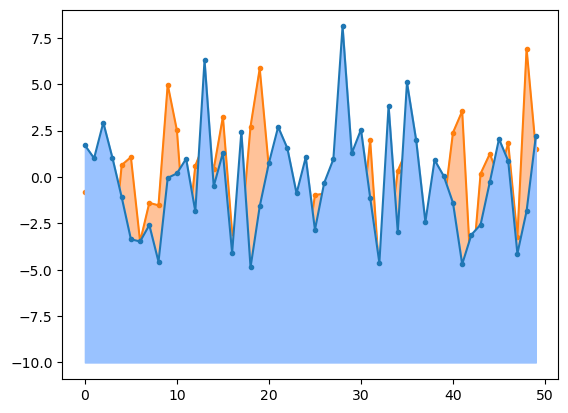

In [6]:
plt.plot(mat1_pos, marker='.', zorder=12)
plt.plot(mat2_pos, marker='.', zorder=10)
plt.fill_between(x=np.linspace(0, 49, 50), y1=-10, y2=mat1_pos, interpolate=True, zorder=11, color='#99c2ff')
plt.fill_between(x=np.linspace(0, 49, 50), y1=mat1_pos, y2=mat2_pos, where=mat2_pos>mat1_pos, interpolate=True, color='#ffc299')

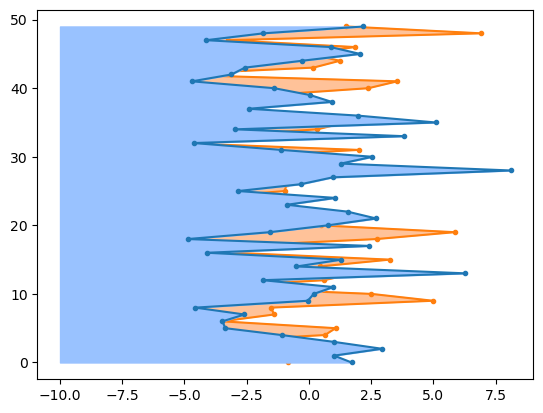

In [7]:
plt.plot(mat1_pos, range(0, 50), marker='.', zorder=12)
plt.fill_betweenx(y=np.linspace(0, 49, 50), x1=-10, x2=mat1_pos, interpolate=True, zorder=11, color='#99c2ff')

plt.plot(mat2_pos, range(0, 50), marker='.', zorder=10)
plt.fill_betweenx(y=np.linspace(0, 49, 50), x1=mat1_pos, x2=mat2_pos, where=mat2_pos>mat1_pos, interpolate=True, color='#ffc299')

In [8]:
First_lay_vf = np.zeros(301)
Second_lay_vf = np.zeros(301)
Third_lay_vf = np.zeros(301)
for i, j in enumerate(np.linspace(-15, 15, 301)):
    First_lay_vf[i] = (mat1_pos_plot > j).sum() / mat1_pos_plot.shape
    Second_lay_vf[i] = ((mat2_pos_plot > j) & (mat2_pos_plot > mat1_pos_plot) & (mat1_pos_plot < j)).sum() / mat1_pos_plot.shape
    Third_lay_vf[i] = ((mat1_pos_plot < j) & (mat2_pos_plot < j)).sum() / mat1_pos_plot.shape

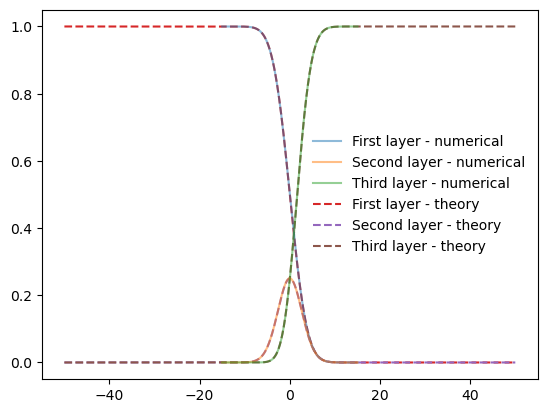

In [9]:
plt.plot(np.linspace(-15, 15, 301), First_lay_vf, zorder=10, label='First layer - numerical', alpha=0.5)
plt.plot(np.linspace(-15, 15, 301), Second_lay_vf, zorder=10, label='Second layer - numerical', alpha=0.5)
plt.plot(np.linspace(-15, 15, 301), Third_lay_vf, zorder=10, label='Third layer - numerical', alpha=0.5)
#plt.plot(np.linspace(-15, 15, 301), First_lay_vf+Second_lay_vf+Third_lay_vf, label=r'total', color='tab:grey')
plt.plot(z, (1-mat1_cdf), linestyle='--', label='First layer - theory')
plt.plot(z, (mat1_cdf)*(1-mat2_cdf), linestyle='--', label='Second layer - theory')
plt.plot(z, mat1_cdf*mat2_cdf*(1-mat3_cdf), linestyle='--', label='Third layer - theory')
plt.legend(frameon=False)

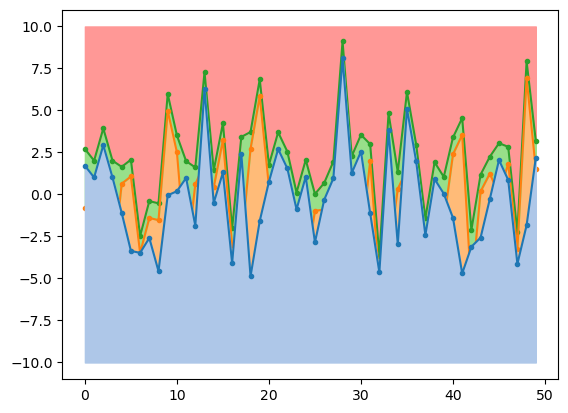

In [10]:
# 4 layer system conformal, where layer 3 is conformal to the surface before it.

%matplotlib inline
from matplotlib import colormaps

colours = colormaps['tab20'].colors

# conformal interface needs to have the extremity of the surface offset by a distance.
# in this case 1 angstrom.
mat3_pos_conf = np.maximum(mat1_pos, mat2_pos) + 1

plt.plot(mat1_pos, marker='.', zorder=12) #first layer end
plt.plot(mat2_pos, marker='.', zorder=10) #second layer end. Note the average distance between the end of first layer and 2nd layer is = 0 angstrom.
plt.plot(mat3_pos_conf, marker='.', zorder=8) #now plot the end of the third layer.

#do the fills
plt.fill_between(x=np.linspace(0, 49, 50), y1=-10, y2=mat1_pos, interpolate=True, zorder=11, color=colours[1]) #first layer fill
plt.fill_between(x=np.linspace(0, 49, 50), y1=mat1_pos, y2=mat2_pos, where=mat2_pos>mat1_pos, interpolate=True, color=colours[3]) #second layer fill
plt.fill_between(x=np.linspace(0, 49, 50), y1=mat2_pos, y2=mat3_pos_conf, where=((mat3_pos_conf>mat2_pos) & (mat3_pos_conf>mat1_pos)), interpolate=True, color=colours[5]) #third layer fill
plt.fill_between(x=np.linspace(0, 49, 50), y1=mat3_pos_conf, y2=10, where=10>mat3_pos_conf, interpolate=True, color=colours[7])

In [11]:
# now do the above with large RV sets do get a numerical approximation of the volume fraction profile.

mat3_pos_plot_conf = np.maximum(mat1_pos_plot, mat2_pos_plot) + 1

# init some arrays. Will look at a length scale of 30 angstroms with 301 bins.
First_lay_vf_conf = np.zeros(301)
Second_lay_vf_conf = np.zeros(301)
Third_lay_vf_conf = np.zeros(301)
Fourth_lay_vf_conf = np.zeros(301)

for i, j in enumerate(np.linspace(-15, 15, 301)):
    First_lay_vf_conf[i] = (mat1_pos_plot > j).sum() / mat1_pos_plot.shape # count how many points are above j.
    Second_lay_vf_conf[i] = ((mat2_pos_plot > j) & (mat2_pos_plot > mat1_pos_plot) & (mat1_pos_plot < j)).sum() / mat1_pos_plot.shape # count how many points are simultaneously are above j if in layer 2, above layer 1  if in layer 2 and how many of layer 1s are below j
    Third_lay_vf_conf[i] = ((mat1_pos_plot < j) & (mat2_pos_plot < j) & (mat3_pos_plot_conf > j) & (mat3_pos_plot_conf > mat2_pos_plot) & (mat3_pos_plot_conf > mat1_pos_plot)).sum() / mat1_pos_plot.shape # & (mat3_pos_plot_conf > mat2_pos_plot)
    Fourth_lay_vf_conf[i] = ((mat1_pos_plot < j) & (mat2_pos_plot < j) & (mat3_pos_plot_conf < j)).sum() / mat1_pos_plot.shape

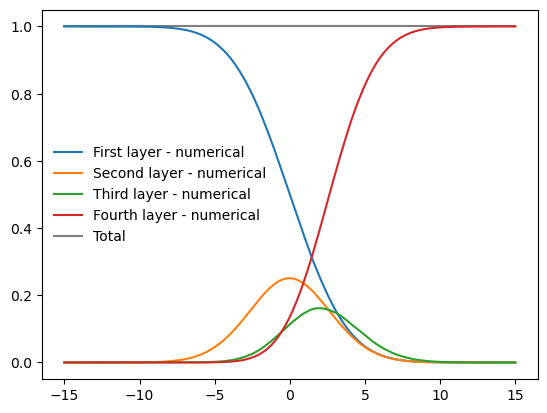

In [12]:
%matplotlib inline
plt.plot(np.linspace(-15, 15, 301), First_lay_vf_conf, zorder=10, label='First layer - numerical')
plt.plot(np.linspace(-15, 15, 301), Second_lay_vf_conf, zorder=10, label='Second layer - numerical')
plt.plot(np.linspace(-15, 15, 301), Third_lay_vf_conf, zorder=10, label='Third layer - numerical')
plt.plot(np.linspace(-15, 15, 301), Fourth_lay_vf_conf, zorder=10, label='Fourth layer - numerical')
plt.plot(np.linspace(-15, 15, 301), First_lay_vf_conf + Second_lay_vf_conf + Third_lay_vf_conf + Fourth_lay_vf_conf, color='tab:grey', label='Total')
plt.legend(frameon=False)

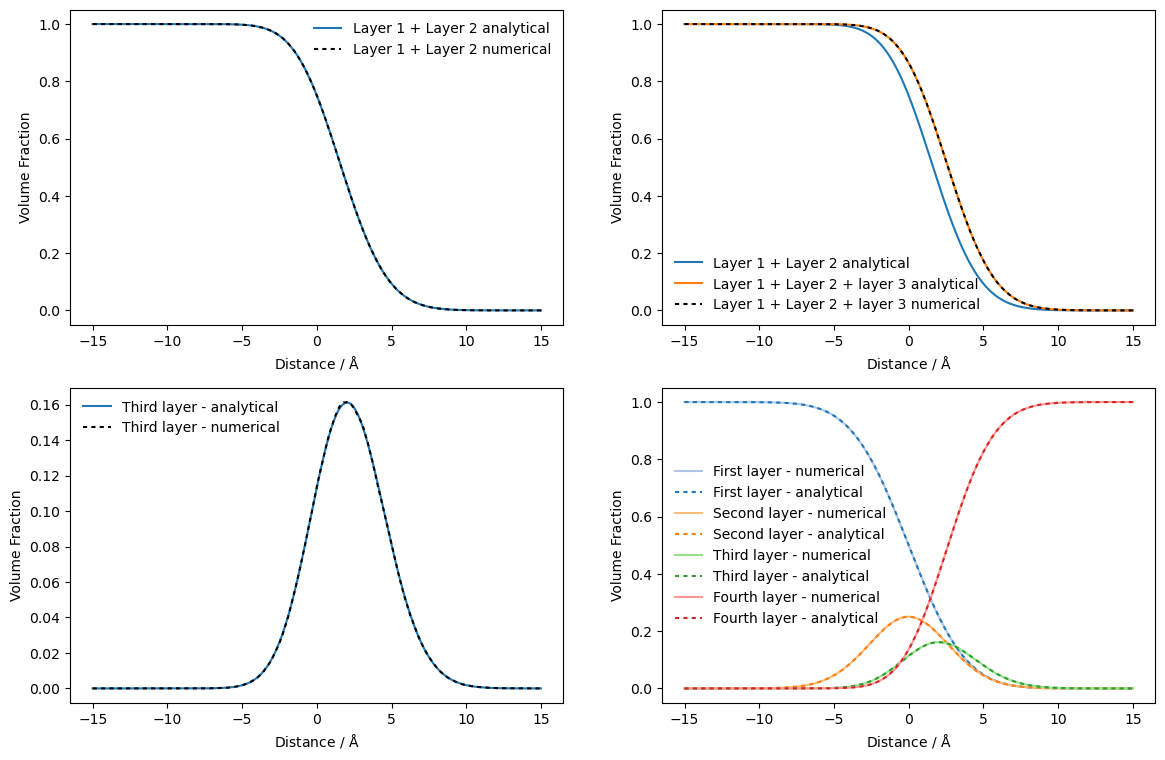

In [13]:
# create some cdfs to check I can re-create the above.

mat1_pos_cdf = scipy.stats.norm.cdf(np.linspace(-15, 15, 301), loc=0, scale=mat1_interf)
mat2_pos_cdf = scipy.stats.norm.cdf(np.linspace(-15, 15, 301), loc=0+mat2_thick, scale=mat2_interf)

mat1_pos_cdf_offset = scipy.stats.norm.cdf(np.linspace(-15, 15, 301), loc=1, scale=mat1_interf)
mat2_pos_cdf_offset = scipy.stats.norm.cdf(np.linspace(-15, 15, 301), loc=1+mat2_thick, scale=mat2_interf)

First = 1-mat1_pos_cdf
Second = mat1_pos_cdf * (1-mat2_pos_cdf)

First_off = 1-mat1_pos_cdf_offset
Second_off = mat1_pos_cdf_offset * (1-mat2_pos_cdf_offset)

fig, ax = plt.subplots(2, 2, figsize=(14, 9))

# layer 1 + layer 2 re-created well (First + Second = First_lay_vf_conf + Second_lay_vf_conf)

ax[0][0].plot(np.linspace(-15, 15, 301), First + Second, label=r'Layer 1 + Layer 2 analytical')
ax[0][0].plot(np.linspace(-15, 15, 301), First_lay_vf_conf + Second_lay_vf_conf, color='k', zorder=10, label=r'Layer 1 + Layer 2 numerical', dashes=[2, 2])

ax[0][1].plot(np.linspace(-15, 15, 301), First + Second, label=r'Layer 1 + Layer 2 analytical') # represents fraction of points that are layer 1 + layer 2
ax[0][1].plot(np.linspace(-15, 15, 301), First_off + Second_off, label=r'Layer 1 + Layer 2 + layer 3 analytical') # represents fraction of points that are layer 1 + layer 2 + layer 3
ax[0][1].plot(np.linspace(-15, 15, 301), First_lay_vf_conf + Second_lay_vf_conf + Third_lay_vf_conf, color='k', zorder=10, label=r'Layer 1 + Layer 2 + layer 3 numerical', dashes=[2, 2])

ax[1][0].plot(np.linspace(-15, 15, 301), (First_off + Second_off) - (First + Second), label=r'Third layer - analytical') # layer 1 + layer 2 + layer 3 - (layer 1 + layer 2)
ax[1][0].plot(np.linspace(-15, 15, 301), Third_lay_vf_conf, zorder=10, color='k', dashes=[2, 2], label='Third layer - numerical')

# full plot
ax[1][1].plot(np.linspace(-15, 15, 301), First_lay_vf_conf, zorder=10, label='First layer - numerical', color=colours[1])
ax[1][1].plot(np.linspace(-15, 15, 301), First, zorder=10, label='First layer - analytical', dashes=[2, 2])

ax[1][1].plot(np.linspace(-15, 15, 301), Second_lay_vf_conf, zorder=10, label='Second layer - numerical', color=colours[3])
ax[1][1].plot(np.linspace(-15, 15, 301), Second, zorder=10, label='Second layer - analytical', dashes=[2, 2])

ax[1][1].plot(np.linspace(-15, 15, 301), Third_lay_vf_conf, zorder=10, label='Third layer - numerical', color=colours[5])
ax[1][1].plot(np.linspace(-15, 15, 301), (First_off + Second_off) - (First + Second), zorder=10, label='Third layer - analytical', dashes=[2, 2])

ax[1][1].plot(np.linspace(-15, 15, 301), Fourth_lay_vf_conf, zorder=10, label='Fourth layer - numerical', color=colours[7])
ax[1][1].plot(np.linspace(-15, 15, 301), 1-(First_off + Second_off), zorder=10, label='Fourth layer - analytical', dashes=[2, 2])

for i in ax:
    for j in i:
        j.legend(frameon=False)
        j.set_xlabel(r'Distance / $\mathrm{\AA{}}$')
        j.set_ylabel(r'Volume Fraction')


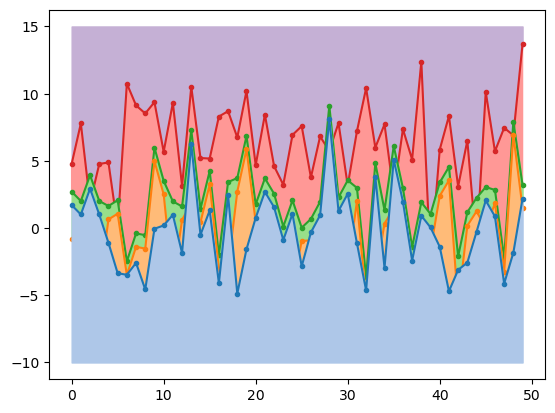

In [14]:
# 5 layer system conformal, where layer 3 is conformal to the surface before it and layer 4 is not conformal

%matplotlib inline
from matplotlib import colormaps

colours = colormaps['tab20'].colors

# conformal interface needs to have the extremity of the surface offset by a distance.
# in this case 1 angstrom.
mat3_pos_conf = np.maximum(mat1_pos, mat2_pos) + 1
mat4_pos = scipy.stats.norm.rvs(loc=0+0+1+5, scale=3, size=50)

plt.plot(mat1_pos, marker='.', zorder=12) #first layer end
plt.plot(mat2_pos, marker='.', zorder=10) #second layer end. Note the average distance between the end of first layer and 2nd layer is = 0 angstrom.
plt.plot(mat3_pos_conf, marker='.', zorder=8) #now plot the end of the third layer.
plt.plot(mat4_pos, marker='.', zorder=6)

#do the fills
plt.fill_between(x=np.linspace(0, 49, 50), y1=-10, y2=mat1_pos, interpolate=True, zorder=11, color=colours[1]) #first layer fill
plt.fill_between(x=np.linspace(0, 49, 50), y1=mat1_pos, y2=mat2_pos, where=mat2_pos>mat1_pos, zorder=9, interpolate=True, color=colours[3]) #second layer fill
plt.fill_between(x=np.linspace(0, 49, 50), y1=mat2_pos, y2=mat3_pos_conf, where=((mat3_pos_conf>mat2_pos) & (mat3_pos_conf>mat1_pos)), zorder=7, interpolate=True, color=colours[5]) #third layer fill
plt.fill_between(x=np.linspace(0, 49, 50), y1=mat3_pos_conf, y2=mat4_pos, where=mat4_pos>mat3_pos_conf, interpolate=True, color=colours[7], zorder=5)
plt.fill_between(x=np.linspace(0, 49, 50), y1=mat4_pos, y2=15, where=15>mat4_pos, interpolate=True, color=colours[9], zorder=3)

In [15]:
# now do the above with large RV sets do get a numerical approximation of the volume fraction profile.

mat3_pos_plot_conf = np.maximum(mat1_pos_plot, mat2_pos_plot) + 1
mat4_pos_plot = scipy.stats.norm.rvs(loc=0+0+1+5, scale=3, size=500000)

# init some arrays. Will look at a length scale of 30 angstroms with 301 bins.
First_lay_vf_conf = np.zeros(301)
Second_lay_vf_conf = np.zeros(301)
Third_lay_vf_conf = np.zeros(301)
Fourth_lay_vf_conf = np.zeros(301)
Fifth_lay_vf_conf = np.zeros(301)

for i, j in enumerate(np.linspace(-15, 15, 301)):
    First_lay_vf_conf[i] = (mat1_pos_plot > j).sum() / mat1_pos_plot.shape # count how many points are above j.
    Second_lay_vf_conf[i] = ((mat2_pos_plot > j) & (mat1_pos_plot < j)).sum() / mat1_pos_plot.shape # count how many points are simultaneously are above j if in layer 2, above layer 1 if in layer 2 and how many of layer 1s are below j
    Third_lay_vf_conf[i] = ((mat1_pos_plot < j) & (mat2_pos_plot < j) & (mat3_pos_plot_conf > j)).sum() / mat1_pos_plot.shape # & (mat3_pos_plot_conf > mat2_pos_plot)
    Fourth_lay_vf_conf[i] = ((mat1_pos_plot < j) & (mat2_pos_plot < j) & (mat3_pos_plot_conf < j) & (mat4_pos_plot > j)).sum() / mat1_pos_plot.shape
    Fifth_lay_vf_conf[i] = ((mat1_pos_plot < j) & (mat2_pos_plot < j) & (mat3_pos_plot_conf < j) & (mat4_pos_plot < j)).sum() / mat1_pos_plot.shape

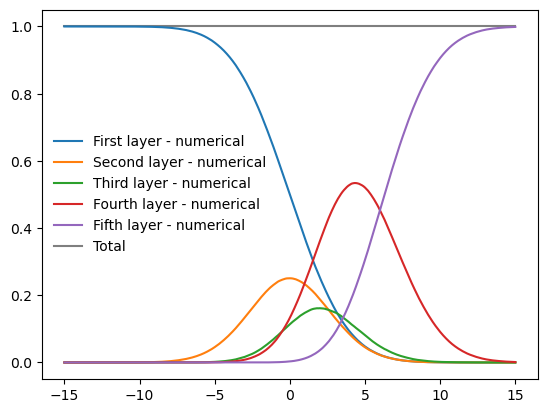

In [16]:
%matplotlib inline
plt.plot(np.linspace(-15, 15, 301), First_lay_vf_conf, zorder=10, label='First layer - numerical')
plt.plot(np.linspace(-15, 15, 301), Second_lay_vf_conf, zorder=10, label='Second layer - numerical')
plt.plot(np.linspace(-15, 15, 301), Third_lay_vf_conf, zorder=10, label='Third layer - numerical')
plt.plot(np.linspace(-15, 15, 301), Fourth_lay_vf_conf, zorder=10, label='Fourth layer - numerical')
plt.plot(np.linspace(-15, 15, 301), Fifth_lay_vf_conf, zorder=10, label='Fifth layer - numerical')
plt.plot(np.linspace(-15, 15, 301), First_lay_vf_conf + Second_lay_vf_conf + Third_lay_vf_conf + Fourth_lay_vf_conf + Fifth_lay_vf_conf, color='tab:grey', label='Total')
plt.legend(frameon=False)

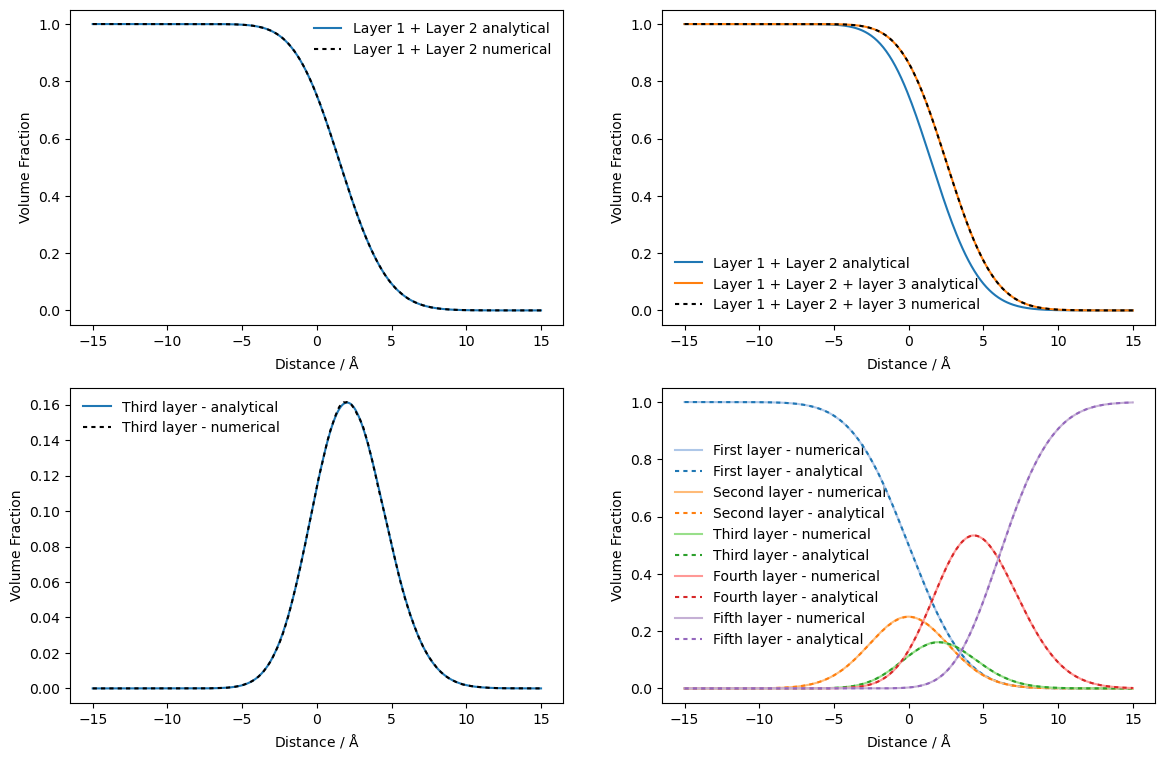

In [17]:
# create some cdfs to check I can re-create the above.

mat1_pos_cdf = scipy.stats.norm.cdf(np.linspace(-15, 15, 301), loc=0, scale=mat1_interf)
mat2_pos_cdf = scipy.stats.norm.cdf(np.linspace(-15, 15, 301), loc=0+mat2_thick, scale=mat2_interf)

mat1_pos_cdf_offset = scipy.stats.norm.cdf(np.linspace(-15, 15, 301), loc=1, scale=mat1_interf)
mat2_pos_cdf_offset = scipy.stats.norm.cdf(np.linspace(-15, 15, 301), loc=1+mat2_thick, scale=mat2_interf)

mat4_pos_cdf = scipy.stats.norm.cdf(np.linspace(-15, 15, 301), loc=6, scale=3)

First = 1-mat1_pos_cdf
Second = mat1_pos_cdf * (1-mat2_pos_cdf)

First_off = 1-mat1_pos_cdf_offset
Second_off = mat1_pos_cdf_offset * (1-mat2_pos_cdf_offset)

Fourth = (1-(First_off+Second_off))*(1-mat4_pos_cdf)

Fifth = (1-(First_off+Second_off))*(mat4_pos_cdf)

fig, ax = plt.subplots(2, 2, figsize=(14, 9))

# layer 1 + layer 2 re-created well (First + Second = First_lay_vf_conf + Second_lay_vf_conf)

ax[0][0].plot(np.linspace(-15, 15, 301), First + Second, label=r'Layer 1 + Layer 2 analytical')
ax[0][0].plot(np.linspace(-15, 15, 301), First_lay_vf_conf + Second_lay_vf_conf, color='k', zorder=10, label=r'Layer 1 + Layer 2 numerical', dashes=[2, 2])

ax[0][1].plot(np.linspace(-15, 15, 301), First + Second, label=r'Layer 1 + Layer 2 analytical') # represents fraction of points that are layer 1 + layer 2
ax[0][1].plot(np.linspace(-15, 15, 301), First_off + Second_off, label=r'Layer 1 + Layer 2 + layer 3 analytical') # represents fraction of points that are layer 1 + layer 2 + layer 3
ax[0][1].plot(np.linspace(-15, 15, 301), First_lay_vf_conf + Second_lay_vf_conf + Third_lay_vf_conf, color='k', zorder=10, label=r'Layer 1 + Layer 2 + layer 3 numerical', dashes=[2, 2])

ax[1][0].plot(np.linspace(-15, 15, 301), (First_off + Second_off) - (First + Second), label=r'Third layer - analytical') # layer 1 + layer 2 + layer 3 - (layer 1 + layer 2)
ax[1][0].plot(np.linspace(-15, 15, 301), Third_lay_vf_conf, zorder=10, color='k', dashes=[2, 2], label='Third layer - numerical')

# full plot
ax[1][1].plot(np.linspace(-15, 15, 301), First_lay_vf_conf, zorder=10, label='First layer - numerical', color=colours[1])
ax[1][1].plot(np.linspace(-15, 15, 301), First, zorder=10, label='First layer - analytical', dashes=[2, 2])

ax[1][1].plot(np.linspace(-15, 15, 301), Second_lay_vf_conf, zorder=10, label='Second layer - numerical', color=colours[3])
ax[1][1].plot(np.linspace(-15, 15, 301), Second, zorder=10, label='Second layer - analytical', dashes=[2, 2])

ax[1][1].plot(np.linspace(-15, 15, 301), Third_lay_vf_conf, zorder=10, label='Third layer - numerical', color=colours[5])
ax[1][1].plot(np.linspace(-15, 15, 301), (First_off + Second_off) - (First + Second), zorder=10, label='Third layer - analytical', dashes=[2, 2])

ax[1][1].plot(np.linspace(-15, 15, 301), Fourth_lay_vf_conf, zorder=10, label='Fourth layer - numerical', color=colours[7])
ax[1][1].plot(np.linspace(-15, 15, 301), Fourth, zorder=10, label='Fourth layer - analytical', dashes=[2, 2])

ax[1][1].plot(np.linspace(-15, 15, 301), Fifth_lay_vf_conf, zorder=10, label='Fifth layer - numerical', color=colours[9])
ax[1][1].plot(np.linspace(-15, 15, 301), Fifth, zorder=10, label='Fifth layer - analytical', dashes=[2, 2])

for i in ax:
    for j in i:
        j.legend(frameon=False)
        j.set_xlabel(r'Distance / $\mathrm{\AA{}}$')
        j.set_ylabel(r'Volume Fraction')


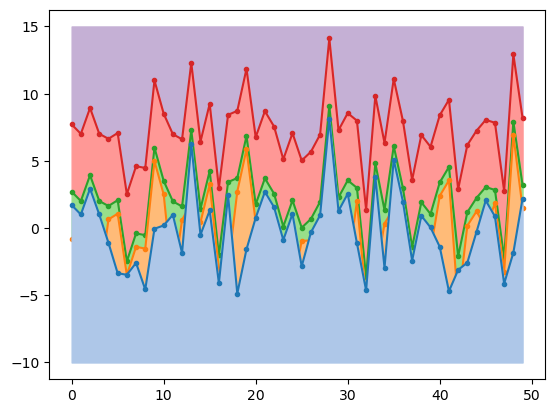

In [18]:
# 5 layer system conformal, where layer 3 is conformal to the surface before it and layer 4 is conformal to layer 3.

%matplotlib inline
from matplotlib import colormaps

colours = colormaps['tab20'].colors

# conformal interface needs to have the extremity of the surface offset by a distance.
# in this case 1 angstrom.
mat3_pos_conf = np.maximum(mat1_pos, mat2_pos) + 1
mat4_pos_conf = np.maximum(mat1_pos, mat2_pos) + 1 + 5

plt.plot(mat1_pos, marker='.', zorder=12) #first layer end
plt.plot(mat2_pos, marker='.', zorder=10) #second layer end. Note the average distance between the end of first layer and 2nd layer is = 0 angstrom.
plt.plot(mat3_pos_conf, marker='.', zorder=8) #now plot the end of the third layer.
plt.plot(mat4_pos_conf, marker='.', zorder=6)

#do the fills
plt.fill_between(x=np.linspace(0, 49, 50), y1=-10, y2=mat1_pos, interpolate=True, zorder=11, color=colours[1]) #first layer fill
plt.fill_between(x=np.linspace(0, 49, 50), y1=mat1_pos, y2=mat2_pos, where=mat2_pos>mat1_pos, zorder=9, interpolate=True, color=colours[3]) #second layer fill
plt.fill_between(x=np.linspace(0, 49, 50), y1=mat2_pos, y2=mat3_pos_conf, where=((mat3_pos_conf>mat2_pos) & (mat3_pos_conf>mat1_pos)), zorder=7, interpolate=True, color=colours[5]) #third layer fill
plt.fill_between(x=np.linspace(0, 49, 50), y1=mat3_pos_conf, y2=mat4_pos_conf, where=mat4_pos_conf>mat3_pos_conf, interpolate=True, color=colours[7], zorder=5)
plt.fill_between(x=np.linspace(0, 49, 50), y1=mat4_pos_conf, y2=15, where=15>mat4_pos_conf, interpolate=True, color=colours[9], zorder=3)

In [19]:
# now do the above with large RV sets do get a numerical approximation of the volume fraction profile.

mat3_pos_plot_conf = np.maximum(mat1_pos_plot, mat2_pos_plot) + 1
mat4_pos_plot_conf = np.maximum(mat1_pos_plot, mat2_pos_plot) + 1 + 1

# init some arrays. Will look at a length scale of 30 angstroms with 301 bins.
First_lay_vf_conf = np.zeros(301)
Second_lay_vf_conf = np.zeros(301)
Third_lay_vf_conf = np.zeros(301)
Fourth_lay_vf_conf = np.zeros(301)
Fifth_lay_vf_conf = np.zeros(301)

for i, j in enumerate(np.linspace(-15, 15, 301)):
    First_lay_vf_conf[i] = (mat1_pos_plot > j).sum() / mat1_pos_plot.shape # count how many points are above j.
    Second_lay_vf_conf[i] = ((mat2_pos_plot > j) & (mat1_pos_plot < j)).sum() / mat1_pos_plot.shape # count how many points are simultaneously are above j if in layer 2, above layer 1 if in layer 2 and how many of layer 1s are below j
    Third_lay_vf_conf[i] = ((mat1_pos_plot < j) & (mat2_pos_plot < j) & (mat3_pos_plot_conf > j)).sum() / mat1_pos_plot.shape # & (mat3_pos_plot_conf > mat2_pos_plot)
    Fourth_lay_vf_conf[i] = ((mat1_pos_plot < j) & (mat2_pos_plot < j) & (mat3_pos_plot_conf < j) & (mat4_pos_plot_conf > j)).sum() / mat1_pos_plot.shape
    Fifth_lay_vf_conf[i] = ((mat1_pos_plot < j) & (mat2_pos_plot < j) & (mat3_pos_plot_conf < j) & (mat4_pos_plot_conf < j)).sum() / mat1_pos_plot.shape

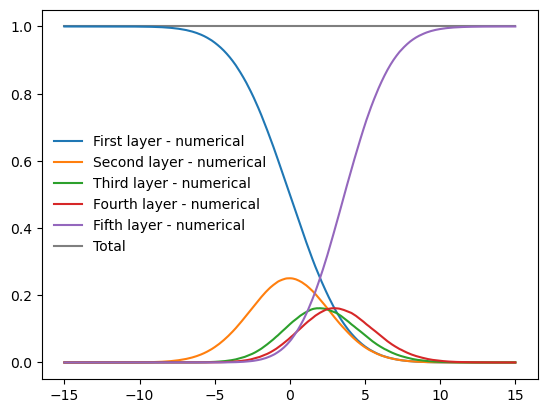

In [20]:
%matplotlib inline
plt.plot(np.linspace(-15, 15, 301), First_lay_vf_conf, zorder=10, label='First layer - numerical')
plt.plot(np.linspace(-15, 15, 301), Second_lay_vf_conf, zorder=10, label='Second layer - numerical')
plt.plot(np.linspace(-15, 15, 301), Third_lay_vf_conf, zorder=10, label='Third layer - numerical')
plt.plot(np.linspace(-15, 15, 301), Fourth_lay_vf_conf, zorder=10, label='Fourth layer - numerical')
plt.plot(np.linspace(-15, 15, 301), Fifth_lay_vf_conf, zorder=10, label='Fifth layer - numerical')
plt.plot(np.linspace(-15, 15, 301), First_lay_vf_conf + Second_lay_vf_conf + Third_lay_vf_conf + Fourth_lay_vf_conf + Fifth_lay_vf_conf, color='tab:grey', label='Total')
plt.legend(frameon=False)

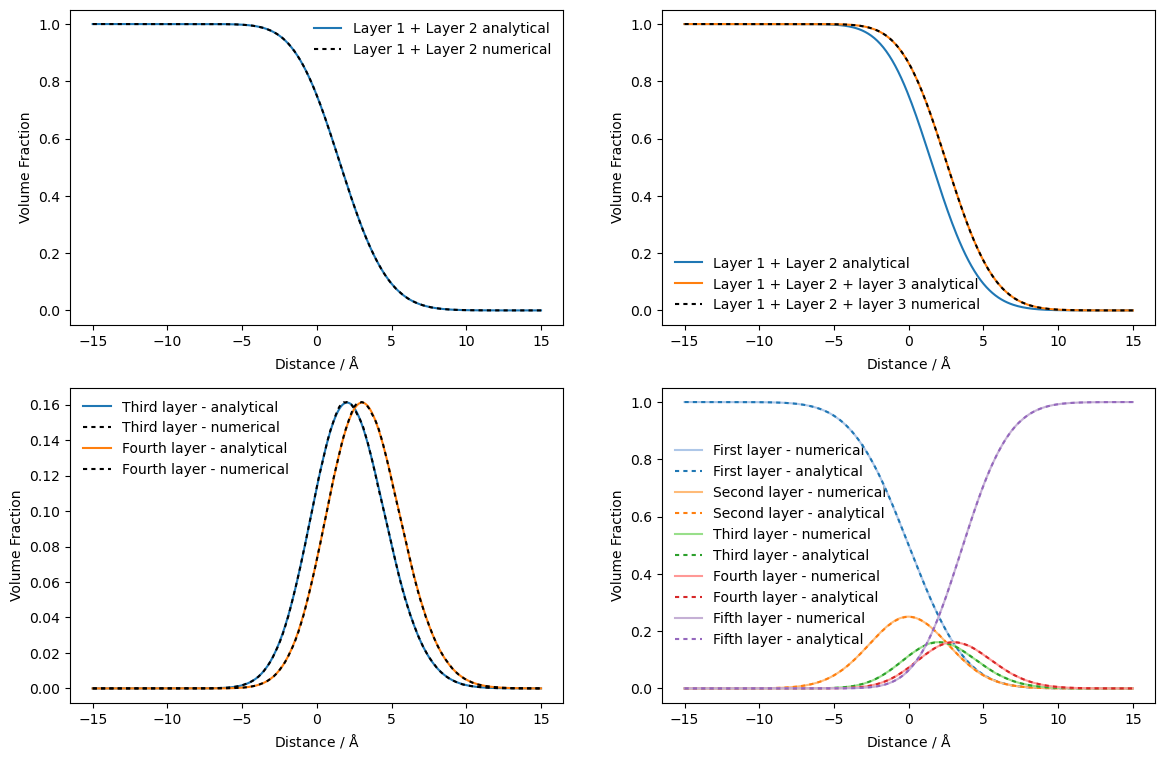

In [21]:
# create some cdfs to check I can re-create the above.

mat1_pos_cdf = scipy.stats.norm.cdf(np.linspace(-15, 15, 301), loc=0, scale=mat1_interf)
mat2_pos_cdf = scipy.stats.norm.cdf(np.linspace(-15, 15, 301), loc=0+mat2_thick, scale=mat2_interf)

mat1_pos_cdf_offset = scipy.stats.norm.cdf(np.linspace(-15, 15, 301), loc=1, scale=mat1_interf)
mat2_pos_cdf_offset = scipy.stats.norm.cdf(np.linspace(-15, 15, 301), loc=1+mat2_thick, scale=mat2_interf)

mat1_pos_cdf_offset2 = scipy.stats.norm.cdf(np.linspace(-15, 15, 301), loc=2, scale=mat1_interf)
mat2_pos_cdf_offset2 = scipy.stats.norm.cdf(np.linspace(-15, 15, 301), loc=2+mat2_thick, scale=mat2_interf)

#mat4_pos_cdf = scipy.stats.norm.cdf(np.linspace(-15, 15, 301), loc=6, scale=3)

First = 1-mat1_pos_cdf
Second = mat1_pos_cdf * (1-mat2_pos_cdf)

First_off = 1-mat1_pos_cdf_offset
Second_off = mat1_pos_cdf_offset * (1-mat2_pos_cdf_offset)

First_off2 = 1-mat1_pos_cdf_offset2
Second_off2 = mat1_pos_cdf_offset2 * (1-mat2_pos_cdf_offset2)

Fourth = (First_off2 + Second_off2) - (First_off + Second_off)

Fifth = (1-(First_off2+Second_off2))

fig, ax = plt.subplots(2, 2, figsize=(14, 9))

# layer 1 + layer 2 re-created well (First + Second = First_lay_vf_conf + Second_lay_vf_conf)

ax[0][0].plot(np.linspace(-15, 15, 301), First + Second, label=r'Layer 1 + Layer 2 analytical')
ax[0][0].plot(np.linspace(-15, 15, 301), First_lay_vf_conf + Second_lay_vf_conf, color='k', zorder=10, label=r'Layer 1 + Layer 2 numerical', dashes=[2, 2])

ax[0][1].plot(np.linspace(-15, 15, 301), First + Second, label=r'Layer 1 + Layer 2 analytical') # represents fraction of points that are layer 1 + layer 2
ax[0][1].plot(np.linspace(-15, 15, 301), First_off + Second_off, label=r'Layer 1 + Layer 2 + layer 3 analytical') # represents fraction of points that are layer 1 + layer 2 + layer 3
ax[0][1].plot(np.linspace(-15, 15, 301), First_lay_vf_conf + Second_lay_vf_conf + Third_lay_vf_conf, color='k', zorder=10, label=r'Layer 1 + Layer 2 + layer 3 numerical', dashes=[2, 2])

ax[1][0].plot(np.linspace(-15, 15, 301), (First_off + Second_off) - (First + Second), label=r'Third layer - analytical') 
ax[1][0].plot(np.linspace(-15, 15, 301), Third_lay_vf_conf, zorder=10, color='k', dashes=[2, 2], label='Third layer - numerical')

ax[1][0].plot(np.linspace(-15, 15, 301), Fourth, label=r'Fourth layer - analytical') 
ax[1][0].plot(np.linspace(-15, 15, 301), Fourth_lay_vf_conf, zorder=10, color='k', dashes=[2, 2], label='Fourth layer - numerical')

# full plot
ax[1][1].plot(np.linspace(-15, 15, 301), First_lay_vf_conf, zorder=10, label='First layer - numerical', color=colours[1])
ax[1][1].plot(np.linspace(-15, 15, 301), First, zorder=10, label='First layer - analytical', dashes=[2, 2])

ax[1][1].plot(np.linspace(-15, 15, 301), Second_lay_vf_conf, zorder=10, label='Second layer - numerical', color=colours[3])
ax[1][1].plot(np.linspace(-15, 15, 301), Second, zorder=10, label='Second layer - analytical', dashes=[2, 2])

ax[1][1].plot(np.linspace(-15, 15, 301), Third_lay_vf_conf, zorder=10, label='Third layer - numerical', color=colours[5])
ax[1][1].plot(np.linspace(-15, 15, 301), (First_off + Second_off) - (First + Second), zorder=10, label='Third layer - analytical', dashes=[2, 2])

ax[1][1].plot(np.linspace(-15, 15, 301), Fourth_lay_vf_conf, zorder=10, label='Fourth layer - numerical', color=colours[7])
ax[1][1].plot(np.linspace(-15, 15, 301), Fourth, zorder=10, label='Fourth layer - analytical', dashes=[2, 2])

ax[1][1].plot(np.linspace(-15, 15, 301), Fifth_lay_vf_conf, zorder=10, label='Fifth layer - numerical', color=colours[9])
ax[1][1].plot(np.linspace(-15, 15, 301), Fifth, zorder=10, label='Fifth layer - analytical', dashes=[2, 2])

for i in ax:
    for j in i:
        j.legend(frameon=False)
        j.set_xlabel(r'Distance / $\mathrm{\AA{}}$')
        j.set_ylabel(r'Volume Fraction')


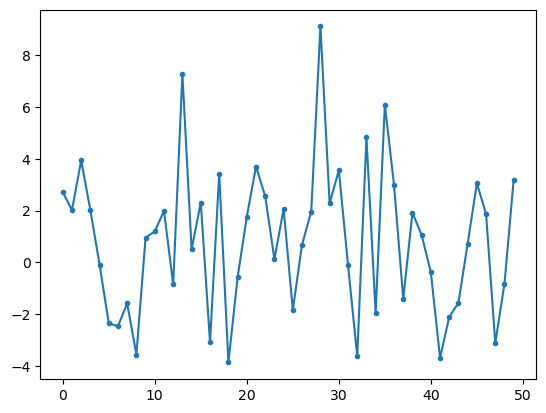

In [39]:
# 5 layer system conformal, where layer 2 is conformal to the surface before it and layer 4 is conformal to layers prior.

%matplotlib inline
from matplotlib import colormaps

colours = colormaps['tab20'].colors

# conformal interface needs to have the extremity of the surface offset by a distance.
# in this case 1 angstrom.
mat2_pos_conf = mat1_pos + 1
mat3_pos = scipy.stats.norm.rvs(loc=1, scale=1, size=50)
mat4_pos_conf = np.maximum(mat1_pos, mat1_pos+1, mat3_pos) + 5

#plt.plot(mat1_pos, marker='.', zorder=12) #first layer end
#plt.plot(mat2_pos_conf, marker='.', zorder=10) #second layer end. Note the average distance between the end of first layer and 2nd layer is = 0 angstrom.
plt.plot(mat3_pos, marker='.', zorder=8) #now plot the end of the third layer.
#plt.plot(mat4_pos_conf, marker='.', zorder=6)

#do the fills
#plt.fill_between(x=np.linspace(0, 49, 50), y1=-10, y2=mat1_pos, interpolate=True, zorder=11, color=colours[1]) #first layer fill
#plt.fill_between(x=np.linspace(0, 49, 50), y1=mat1_pos, y2=mat2_pos, where=mat2_pos>mat1_pos, zorder=9, interpolate=True, color=colours[3]) #second layer fill
#plt.fill_between(x=np.linspace(0, 49, 50), y1=mat2_pos, y2=mat3_pos_conf, where=((mat3_pos_conf>mat2_pos) & (mat3_pos_conf>mat1_pos)), zorder=7, interpolate=True, color=colours[5]) #third layer fill
#plt.fill_between(x=np.linspace(0, 49, 50), y1=mat3_pos_conf, y2=mat4_pos_conf, where=mat4_pos_conf>mat3_pos_conf, interpolate=True, color=colours[7], zorder=5)
#plt.fill_between(x=np.linspace(0, 49, 50), y1=mat4_pos_conf, y2=15, where=15>mat4_pos_conf, interpolate=True, color=colours[9], zorder=3)

In [ ]:
# how different are these scenarios?
%matplotlib inline

import matplotlib.lines as mlines

d_0 = mlines.Line2D([], [], color='tab:blue',  label=r'$d = 0$')
d_1 = mlines.Line2D([], [], color='tab:orange',  label=r'$d = 1$')
d_2 = mlines.Line2D([], [], color='tab:green',  label=r'$d = 2$')
d_3 = mlines.Line2D([], [], color='tab:red',  label=r'$d = 3$')
d_4 = mlines.Line2D([], [], color='tab:purple',  label=r'$d = 4$')
d_5 = mlines.Line2D([], [], color='tab:brown',  label=r'$d = 5$')
d_6 = mlines.Line2D([], [], color='tab:pink',  label=r'$d = 6$')
d_7 = mlines.Line2D([], [], color='tab:grey',  label=r'$d = 7$')
d_8 = mlines.Line2D([], [], color='tab:olive',  label=r'$d = 8$')
d_9 = mlines.Line2D([], [], color='tab:cyan',  label=r'$d = 9$')

fig, ax = plt.subplots(2, 2, sharex='col', figsize=(12, 8))


thickness = np.linspace(0, 9, 10)

for d in thickness:
    mat1_pos_plot_d = scipy.stats.norm.rvs(loc=0, scale=mat1_interf, size=500000)
    mat2_pos_plot_d = scipy.stats.norm.rvs(loc=0+d, scale=mat2_interf, size=500000)
    mat2_pos_plot_d_conf = mat1_pos_plot_d + d
    
    First_lay_vf_conf = np.zeros(601)
    First_lay_vf = np.zeros(601)
    Second_lay_vf_conf = np.zeros(601)
    Second_lay_vf = np.zeros(601)
    Third_lay_vf_conf = np.zeros(601)
    Third_lay_vf = np.zeros(601)
    
    for i, j in enumerate(np.linspace(-30, 30, 601)):
        First_lay_vf[i] = (mat1_pos_plot_d > j).sum() / mat1_pos_plot_d.shape
        First_lay_vf_conf[i] = (mat1_pos_plot_d > j).sum() / mat1_pos_plot_d.shape
        Second_lay_vf[i] = ((mat2_pos_plot_d > j) & (mat2_pos_plot_d > mat1_pos_plot_d) & (mat1_pos_plot_d < j)).sum() / mat1_pos_plot_d.shape
        Second_lay_vf_conf[i] = ((mat2_pos_plot_d_conf > j) & (mat2_pos_plot_d_conf > mat1_pos_plot_d) & (mat1_pos_plot_d < j)).sum() / mat1_pos_plot.shape
        Third_lay_vf[i] = ((mat1_pos_plot_d < j) & (mat2_pos_plot_d < j)).sum() / mat1_pos_plot_d.shape
        Third_lay_vf_conf[i] = ((mat1_pos_plot_d < j) & (mat2_pos_plot_d_conf < j)).sum() / mat1_pos_plot_d.shape
    
    ax[0][0].plot(np.linspace(-30, 30, 601), Second_lay_vf)
    ax[1][0].plot(np.linspace(-30, 30, 601), Second_lay_vf_conf)
    ax[0][1].plot(np.linspace(-30, 30, 601), First_lay_vf, color='k')
    ax[1][1].plot(np.linspace(-30, 30, 601), First_lay_vf_conf, color='k')
    ax[0][1].plot(np.linspace(-30, 30, 601), Third_lay_vf)
    ax[1][1].plot(np.linspace(-30, 30, 601), Third_lay_vf_conf)
    
ax[0][0].text(x=-9, y=0.5, s='Non-conformal')
ax[1][0].text(x=-9, y=0.5, s='Conformal')
ax[0][1].text(x=-9, y=0.5, s='Non-conformal')
ax[1][1].text(x=-9, y=0.5, s='Conformal')
ax[1][0].set_xlim(-10, 20)
ax[1][1].set_xlim(-10, 20)
ax[0][0].legend(handles=[d_0, d_1, d_2, d_3, d_4, d_5, d_6, d_7, d_8, d_9], frameon=False, ncols=10,
                bbox_transform=fig.transFigure, loc='lower left', bbox_to_anchor=(0.03, 0, 0.97, 0.2), mode='expand')
plt.subplots_adjust(left=0.05, bottom=0.1, right=0.995, top=0.99)
plt.show()

In [ ]:
# how different are these scenarios?
%matplotlib inline

from cycler import cycler

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple','tab:brown', 'tab:pink', 'tab:grey', 'tab:olive', 'tab:cyan']

d_0 = mlines.Line2D([], [], color='tab:blue',  label=r'$d = 0$')
d_1 = mlines.Line2D([], [], color='tab:orange',  label=r'$d = 1$')
d_2 = mlines.Line2D([], [], color='tab:green',  label=r'$d = 2$')
d_3 = mlines.Line2D([], [], color='tab:red',  label=r'$d = 3$')
d_4 = mlines.Line2D([], [], color='tab:purple',  label=r'$d = 4$')
d_5 = mlines.Line2D([], [], color='tab:brown',  label=r'$d = 5$')
d_6 = mlines.Line2D([], [], color='tab:pink',  label=r'$d = 6$')
d_7 = mlines.Line2D([], [], color='tab:grey',  label=r'$d = 7$')
d_8 = mlines.Line2D([], [], color='tab:olive',  label=r'$d = 8$')
d_9 = mlines.Line2D([], [], color='tab:cyan',  label=r'$d = 9$')

fig, ax = plt.subplots(2, 5, sharex='col', sharey=True, figsize=(15, 8))

thickness = np.linspace(0, 9, 10)

for k, d in enumerate(thickness):
    mat1_pos_plot_d = scipy.stats.norm.rvs(loc=0, scale=mat1_interf, size=500000)
    mat2_pos_plot_d = scipy.stats.norm.rvs(loc=0+d, scale=mat2_interf, size=500000)
    mat2_pos_plot_d_conf = mat1_pos_plot_d + d
    
    Second_lay_vf_conf = np.zeros(601)
    Second_lay_vf = np.zeros(601)
    
    for i, j in enumerate(np.linspace(-30, 30, 601)):
        Second_lay_vf[i] = ((mat2_pos_plot_d > j) & (mat2_pos_plot_d > mat1_pos_plot_d) & (mat1_pos_plot_d < j)).sum() / mat1_pos_plot_d.shape
        Second_lay_vf_conf[i] = ((mat2_pos_plot_d_conf > j) & (mat2_pos_plot_d_conf > mat1_pos_plot_d) & (mat1_pos_plot_d < j)).sum() / mat1_pos_plot.shape
    
    ax[int(d // 5)][int(d % 5)].plot(np.linspace(-30, 30, 601), Second_lay_vf, alpha=0.8, color=colors[k])
    ax[int(d // 5)][int(d % 5)].plot(np.linspace(-30, 30, 601), Second_lay_vf_conf, linestyle='--', color=colors[k])

for l in ax[1, :]:
    l.set_xlim(-10, 20)
ax[0][0].legend(handles=[d_0, d_1, d_2, d_3, d_4, d_5, d_6, d_7, d_8, d_9], frameon=False, ncols=10,
                bbox_transform=fig.transFigure, loc='lower left', bbox_to_anchor=(0.03, 0, 0.97, 0.2), mode='expand')
plt.subplots_adjust(left=0.05, bottom=0.1, right=0.995, top=0.99)
plt.show()